In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [11]:
nol = []
yesl = []
for i in range(1, 21):
    with open("concentration_data/N_" + str(i) + ".csv") as f1:
        no = np.loadtxt(f1, delimiter=",", skiprows=2)[:, :2406].reshape(-1, 2406)
        nol.append(no)
    with open("concentration_data/Y_" + str(i) + ".csv") as f2:
        yes = np.loadtxt(f2, delimiter=",", skiprows=2)[:, :2406].reshape(-1, 2406)
        yesl.append(yes)

no = np.array(nol)
yes = np.array(yesl)
print("No shape:", no.shape)
print("Yes shape:", yes.shape)

No shape: (20, 7, 2406)
Yes shape: (20, 7, 2406)


In [12]:
no_fft = np.fft.fft(no).view(np.float64).reshape(20, 7, 2406, 2)
yes_fft = np.fft.fft(yes).view(np.float64).reshape(20, 7, 2406, 2)

In [13]:
no_fft.shape

(20, 7, 2406, 2)

In [14]:
no_fft

array([[[[ 1.40352309e+07,  2.22826202e-10],
         [ 1.61276044e+05, -9.74622905e+03],
         [ 1.43319254e+05, -2.03422244e+05],
         ...,
         [-1.18791074e+05,  5.87349111e+04],
         [ 1.43319254e+05,  2.03422244e+05],
         [ 1.61276044e+05,  9.74622905e+03]],

        [[-1.81060611e+07, -3.86080501e-10],
         [ 3.37486967e+05,  5.77531994e+05],
         [ 2.62113933e+05,  4.61875561e+04],
         ...,
         [ 1.01096910e+05,  2.20468730e+05],
         [ 2.62113933e+05, -4.61875561e+04],
         [ 3.37486967e+05, -5.77531994e+05]],

        [[ 2.52126571e+07,  4.11091605e-10],
         [-1.41039238e+05, -3.76048338e+05],
         [-3.49458390e+04, -1.72372126e+04],
         ...,
         [-2.77493333e+05, -2.20636009e+05],
         [-3.49458390e+04,  1.72372126e+04],
         [-1.41039238e+05,  3.76048338e+05]],

        ...,

        [[ 6.44065158e+06,  2.22826202e-10],
         [ 3.45131934e+03,  2.09600716e+05],
         [ 1.04999471e+04,  7.12236414

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Reshape the data
no_data = np.array(no_fft).reshape(20, -1)
yes_data = np.array(yes_fft).reshape(20, -1)

# Create labels
no_labels = np.zeros(no_data.shape[0])
yes_labels = np.ones(yes_data.shape[0])

# Combine the data
X = np.concatenate((no_data, yes_data))
y = np.concatenate((no_labels, yes_labels))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [31]:
X_test.shape

(8, 38496)

In [16]:
# evaluate the model
accuracy = model.score(X_train, y_train)
accuracy

1.0

In [29]:
# print model weights
print(model.coef_, model.intercept_)

[[-2.36037166e-09 -5.10363337e-26  9.81443519e-13 ... -2.07106744e-06
  -8.96472551e-07 -4.77523576e-06]] [-2.04132131e-13]


In [33]:
X.shape

(40, 38496)

In [17]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [9]:
data = np.fft.fft(np.linspace(0, 1, 2406))

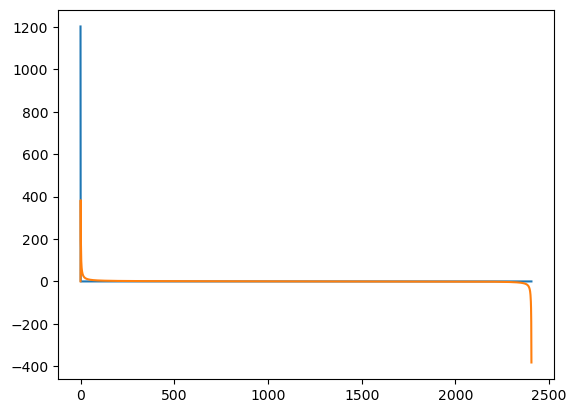

In [10]:
plt.plot(data.real)
plt.plot(data.imag)